In [6]:
import time
from selenium import webdriver
# for headless
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

https://www.dell.com/community/Dell-Community/ct-p/English

Select a Product Forum...


https://www.dell.com/community/Servers/ct-p/ESServers


example post:

https://www.dell.com/community/PowerEdge-Hardware-General/PowerEdge-R730XD-Loading-BIOS-Drivers/m-p/7644944#M65318


- PowerEdge Hardware General: 19,579 posts
- https://www.dell.com/community/PowerEdge-Hardware-General/bd-p/PowerEdge-General-HW

Can filter by Solved (doesnt change url)



single post: https://www.dell.com/community/PowerEdge-Hardware-General/Upgrade-PERC-on-PowerEdge-R720/m-p/7502189#M63601

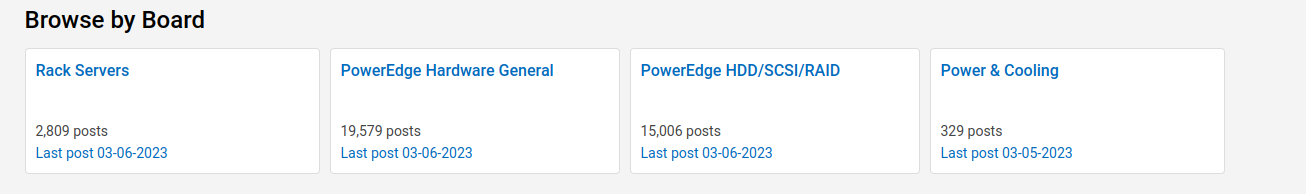


---------------


https://www.dell.com/community/PowerEdge-Hardware-General/T320-video-card-upgrade/m-p/4404427#M38256

https://www.dell.com/community/PowerEdge-Hardware-General/Impossible-to-update-Lifecycle-Dell-Poweredge-T130-through-FTP/m-p/7310257#M61223

https://www.dell.com/community/PowerEdge-Hardware-General/Upgrade-PERC-on-PowerEdge-R720/m-p/7502189#M63601

In [2]:
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.75 Safari/537.36'}



# url = 'https://www.dell.com/community/PowerEdge-Hardware-General/PowerEdge-R730XD-Loading-BIOS-Drivers/m-p/7644944#M65318'
url = 'https://www.dell.com/community/PowerEdge-Hardware-General/bd-p/PowerEdge-General-HW'
r = requests.get(url, headers=headers)
soup = BeautifulSoup(r.text, 'html.parser')

print(soup.title.text)


	PowerEdge Hardware General - Dell Community



In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


## Cookie button

- this is what I beleive to be the main issue, 
- 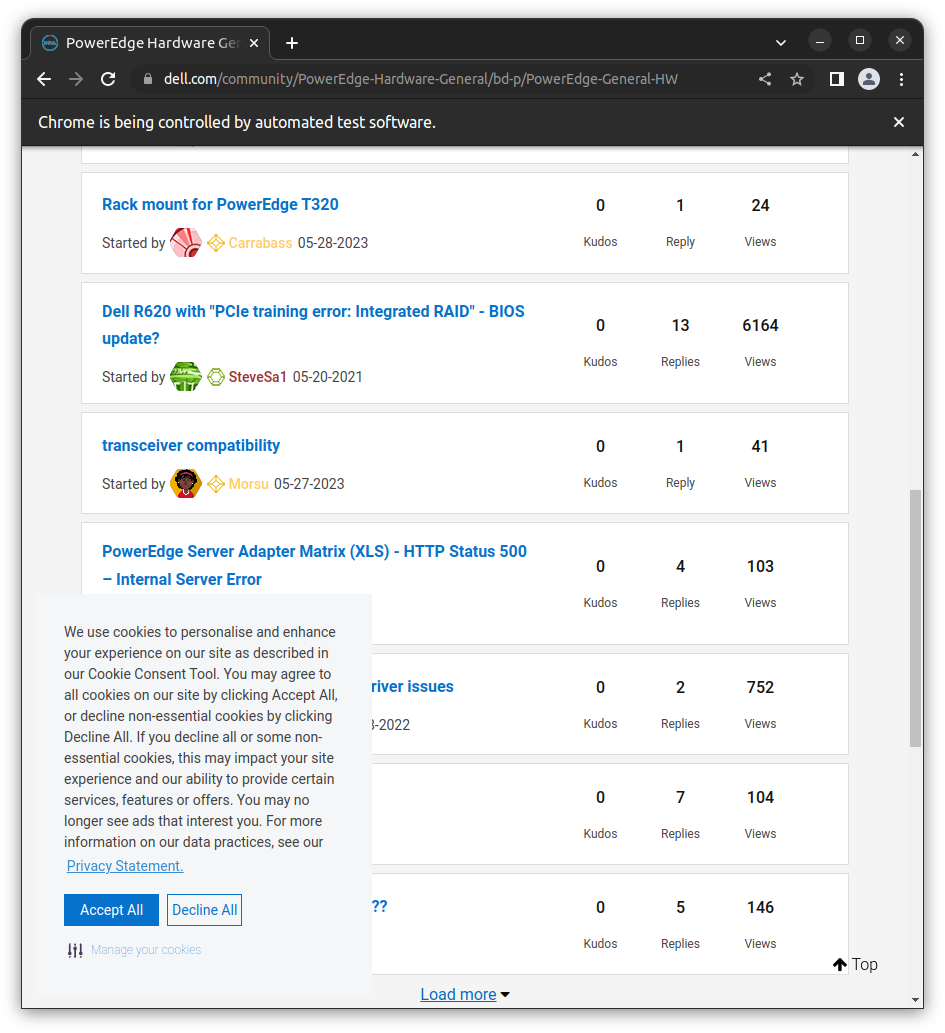
- lets find the element'c Class so we can click it
- 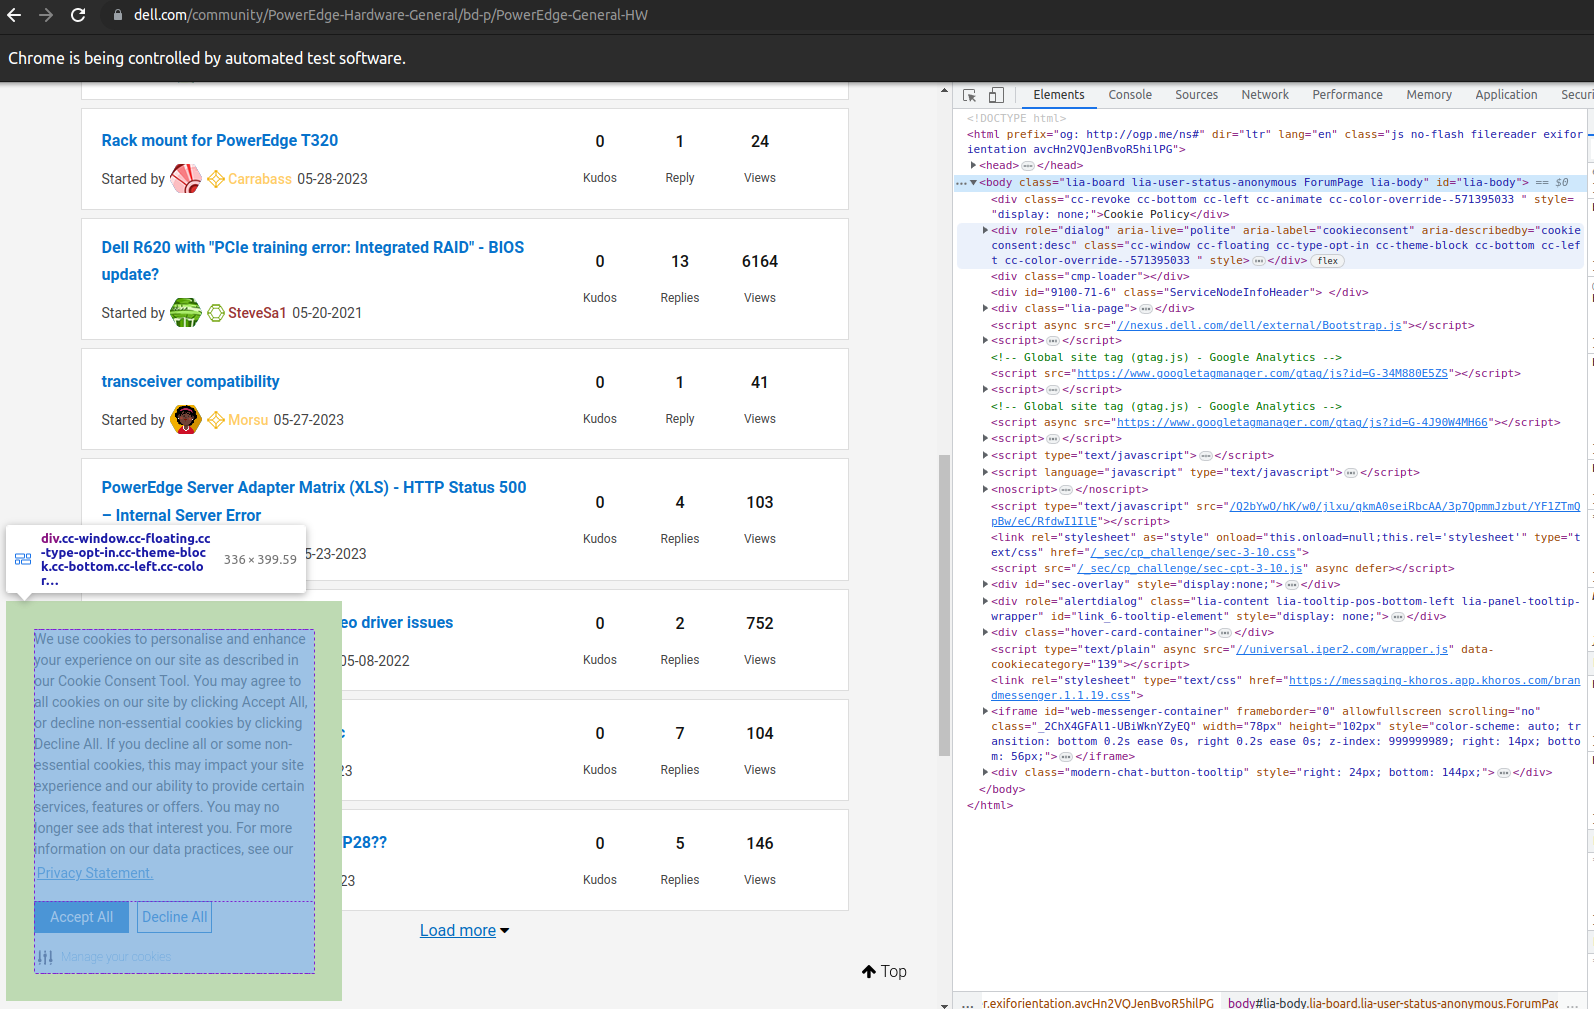





- 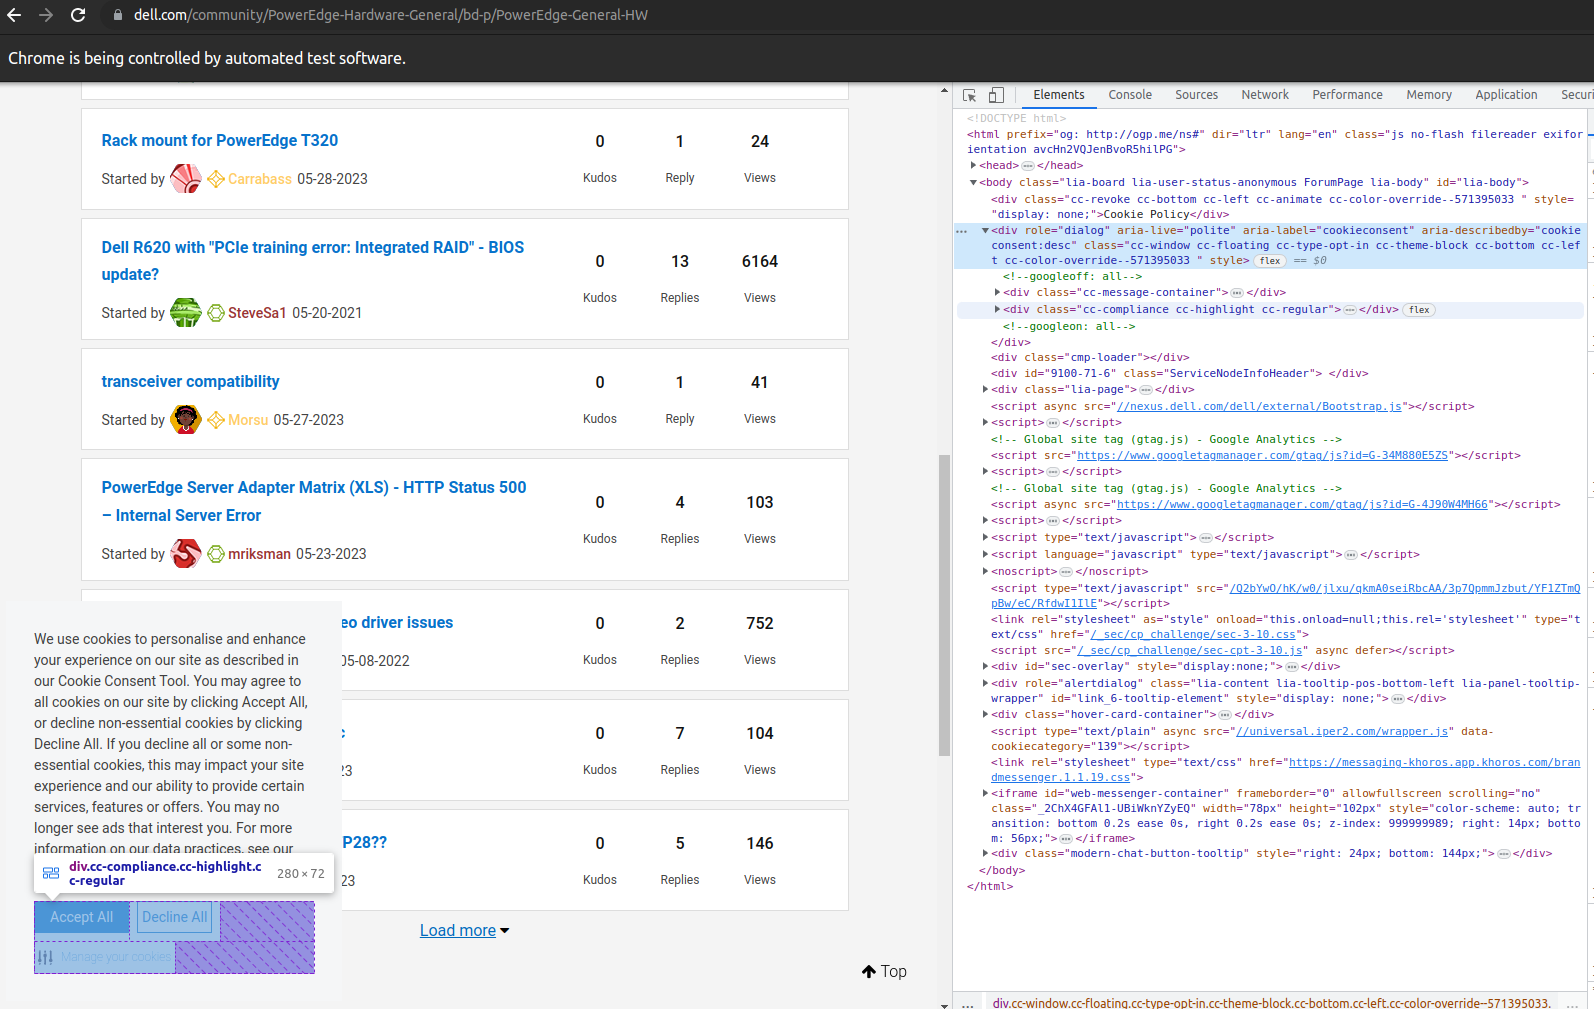
- 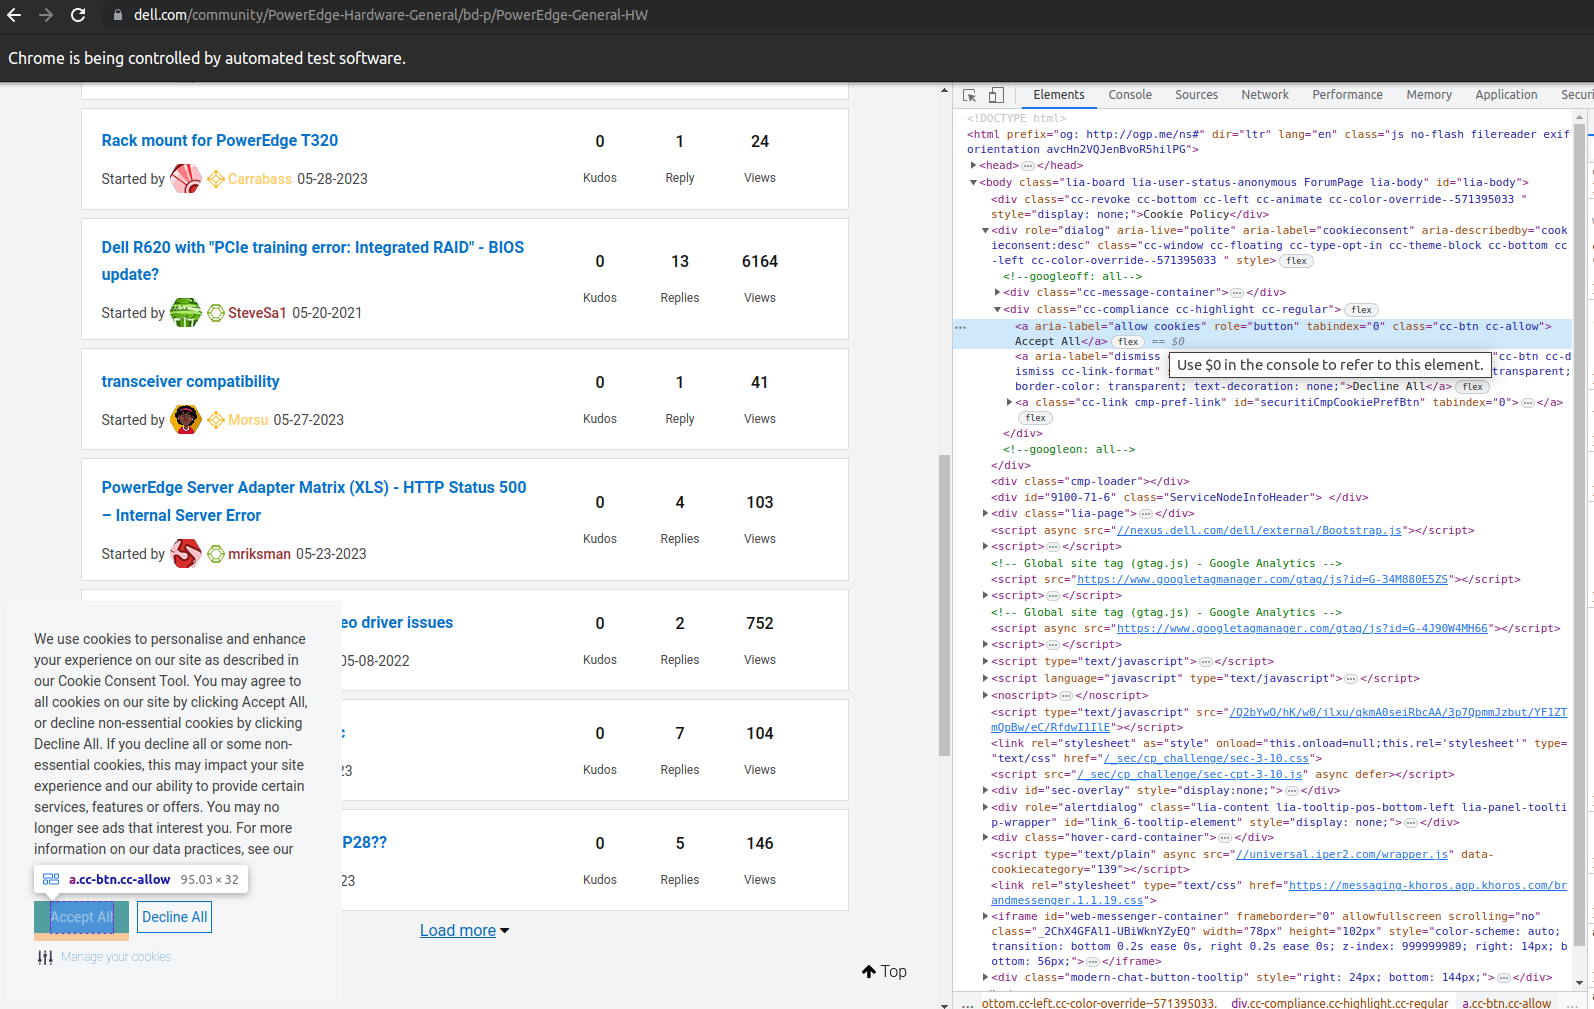

- `<a aria-label="allow cookies" role="button" tabindex="0" class="cc-btn cc-allow">Accept All</a>`

# Selenium vCookie

The ElementClickInterceptedException occurs when the element you are trying to click is not visible or is covered by another element on the page. In this case, it seems that the "Allow" button is not directly clickable or is being obstructed by another element.

To overcome this issue, you can try using a different approach, such as scrolling to the element and then clicking it. Here's an updated version of the code that incorporates scrolling to the "Allow" button:

The Load More should be `<a id="btn-load-more" href="#" class="lia-link-navigation ">Load more</a>`

# Selenium vCookie_2

```
ElementClickInterceptedException: Message: element click intercepted: Element is not clickable at point (740, 1932)
  (Session info: chrome=111.0.5563.64)
Stacktrace:
#0 0x55fc5012b243 <unknown>
#1 0x55fc4feef7a6 <unknown>
#2 0x55fc4ff3348f <unknown>
```

# Selenium vCookie_3

- using `JavascriptExecutor` to perform the click operation on the "Load more" button


- Also, The `MoveTargetOutOfBoundsException` error can occur when the scroll action goes beyond the bounds of the webpage. To avoid this error, we can try a different approach by scrolling to the bottom of the page using execute_script() and then clicking the "Load more" button.

- rather than print, will save to link_list
- param `num_clicks` which indicates the number of times to click the "Load more" button

## Filter list `links`


- rather than print, will save to `link_list`
- wil LATER param `num_clicks` which indicates the number of times to click the "Load more" button


Remove:


- `https://www.dell.com/community/PowerEdge-Hardware-General/bd-p/PowerEdge-General-HW` 


Retain links like the links below:

- `https://www.dell.com/community/PowerEdge-Hardware-General/Dell-R820-dedicated-iDRAC-interface-issues/td-p/8396971/jump-to/first-unread-message` 
- `https://www.dell.com/community/PowerEdge-Hardware-General/Unable-to-upgrade-iDRAC-7-from-2-21-21/td-p/8388296/jump-to/first-unread-message`

In [35]:
len(link_list)

231

# Filtered_List 

In [40]:
len(filtered_links)

82

# Filter webpage by `Solved` cases

- lets go back and adjust method, to click Filter by Solved first
- 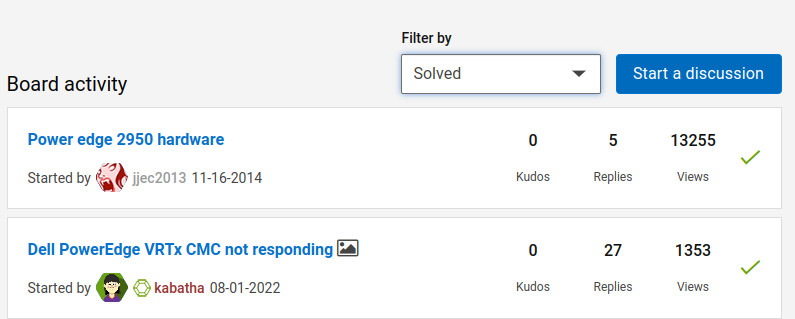

- Right click and `Inspect Element`
- 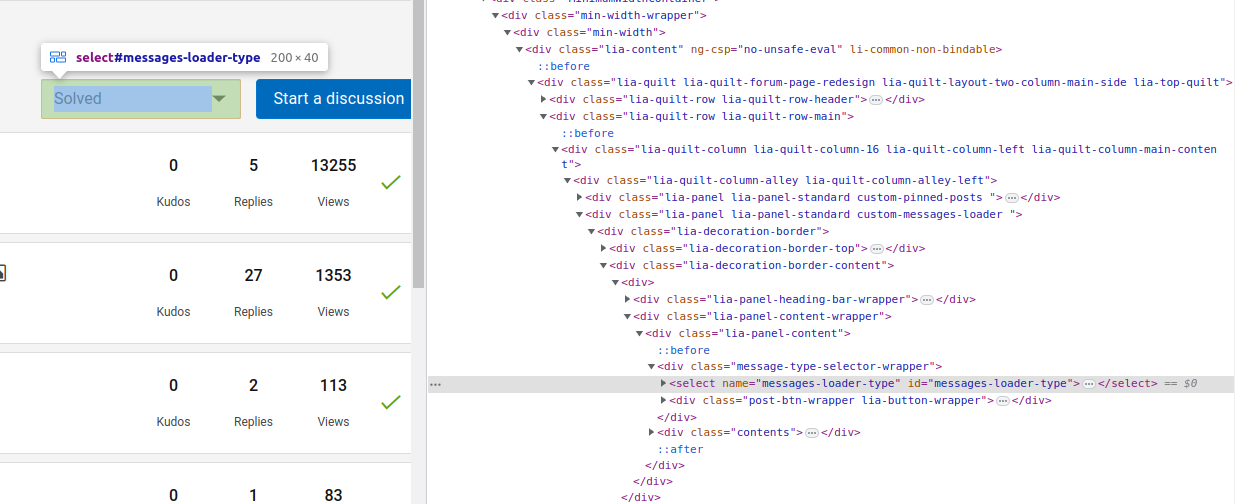

- `<select name="messages-loader-type" id="messages-loader-type"> <option value="recent" selected="">Latest activity</option> <option value="solved">Solved</option> <option value="topkudos">Kudoed</option> </select>`
- `<option value="solved">Solved</option>`


```
    # Select the "Solved" option from the dropdown
    select_element = driver.find_element(By.ID, 'messages-loader-type')
    option_solved = select_element.find_element(By.XPATH, "//option[@value='solved']")
    option_solved.click()
    
```

In [7]:
def automate_dell_forum(num_clicks):
    # Instantiate the Selenium web driver
    driver = webdriver.Chrome()
    driver.maximize_window()  # Maximize the browser window

    # Navigate to the Dell community forum page
    driver.get('https://www.dell.com/community/PowerEdge-Hardware-General/bd-p/PowerEdge-General-HW')

    # Press the "Accept All" button for cookies
    accept_button = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, '//a[@aria-label="allow cookies"]')))
    accept_button.click()
    
    # Select the "Solved" option from the dropdown
    select_element = driver.find_element(By.ID, 'messages-loader-type')
    option_solved = select_element.find_element(By.XPATH, "//option[@value='solved']")
    option_solved.click()

    # Wait for the page to load after selecting "Solved" option
    time.sleep(2)

    # Scroll to the bottom of the page
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    # Wait for a few seconds before clicking the "Load more" button
    time.sleep(2)

    # Click the "Load more" button the specified number of times
    load_more_button = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.ID, 'btn-load-more')))
    for _ in range(num_clicks):
        load_more_button.click()

    # Wait for the page to load after clicking "Load more" button
    time.sleep(2)

    # Get all href urls on the page and save them to a list
    urls = driver.find_elements(By.XPATH, '//a[@href]')
    url_list = [url.get_attribute('href') for url in urls]

    # Close the Selenium web driver
    driver.quit()

    return url_list

# Call the method to automate the process and get the url list
url_list = automate_dell_forum(3)

# Print the urls (forum posts)
for url in url_list:
    print(url)



https://www.dell.com/learn/IE/en/IEcorp1/policies-privacy
http://www.dell.com/
https://www.delltechnologies.com/
https://www.dell.com/en-us/
https://www.dell.com/community/PowerEdge-Hardware-General/bd-p/custom.dell.link.solutions.href
https://www.dell.com/support/home/?l=en
https://www.dell.com/community/
javascript:void(0)
https://www.dell.com/community/Dell-Community/ct-p/English?profile.language=en
https://www.dell.com/community/Comunidade-da-Dell/ct-p/Portuguese?profile.language=pt
https://www.dell.com/community/Comunidad-de-Dell/ct-p/Spanish?profile.language=es
https://www.dell.com/community/%E6%88%B4%E5%B0%94%E7%A4%BE%E5%8C%BA/ct-p/Chinese?profile.language=zh-CN
https://www.dell.com/community/Communaut%C3%A9-Dell/ct-p/French?profile.language=fr
https://www.dell.com/community/Dell-Gemeinschaft/ct-p/German?profile.language=de
https://www.dell.com/community/%E3%83%87%E3%83%AB%E3%82%B3%E3%83%9F%E3%83%A5%E3%83%8B%E3%83%86%E3%82%A3/ct-p/Japanese?profile.language=ja
https://www.dell.co

In [8]:
len(url_list)

229

# Filtered Solved List

In [11]:
def filtered_urls(url_list):
    filtered_urls = []
    exclude_urls = [
        'https://www.dell.com/community/PowerEdge-Hardware-General/bd-p/PowerEdge-General-HW#',
        'https://www.dell.com/community/PowerEdge-Hardware-General/bd-p/custom.dell.link.solutions.href',
        'https://www.dell.com/community/PowerEdge-Hardware-General/bd-p/custom.dell.link.careers.href',
        'https://www.dell.com/community/PowerEdge-Hardware-General/bd-p/custom.dell.link.about.href',
        'https://www.dell.com/community/PowerEdge-Hardware-General/bd-p/PowerEdge-General-HW'
    ]
    for url in url_list:
        if url.startswith('https://www.dell.com/community/PowerEdge-Hardware-General/') and url not in exclude_urls:
            filtered_urls.append(url)
    return filtered_urls

# Filter the urls
filtered_urls = filtered_urls(url_list)

# Print the filtered urls
for url in filtered_urls:
    print(url)


https://www.dell.com/community/PowerEdge-Hardware-General/DELL-EMC-Support-videos/td-p/7529991/jump-to/first-unread-message
https://www.dell.com/community/PowerEdge-Hardware-General/High-fan-speed-after-iDRAC-update-to-6-00-00-00/td-p/8224610/jump-to/first-unread-message
https://www.dell.com/community/PowerEdge-Hardware-General/Compatibility-HBA355e-Adapter-with-third-parties-SAN-switches/td-p/8394114/jump-to/first-unread-message
https://www.dell.com/community/PowerEdge-Hardware-General/CPU-compatibility-C6100/td-p/4194152/jump-to/first-unread-message
https://www.dell.com/community/PowerEdge-Hardware-General/Unable-to-upgrade-iDRAC-7-from-2-21-21/td-p/8388296/jump-to/first-unread-message
https://www.dell.com/community/PowerEdge-Hardware-General/Rack-mount-for-PowerEdge-T320/td-p/8398740/jump-to/first-unread-message
https://www.dell.com/community/PowerEdge-Hardware-General/Power-edge-2950-hardware/td-p/4480797/jump-to/first-unread-message
https://www.dell.com/community/PowerEdge-Hardwar

# Next, will go into each webpage and jump to Solution post


- save first post as `question`
- save Solution post as `answer`

- 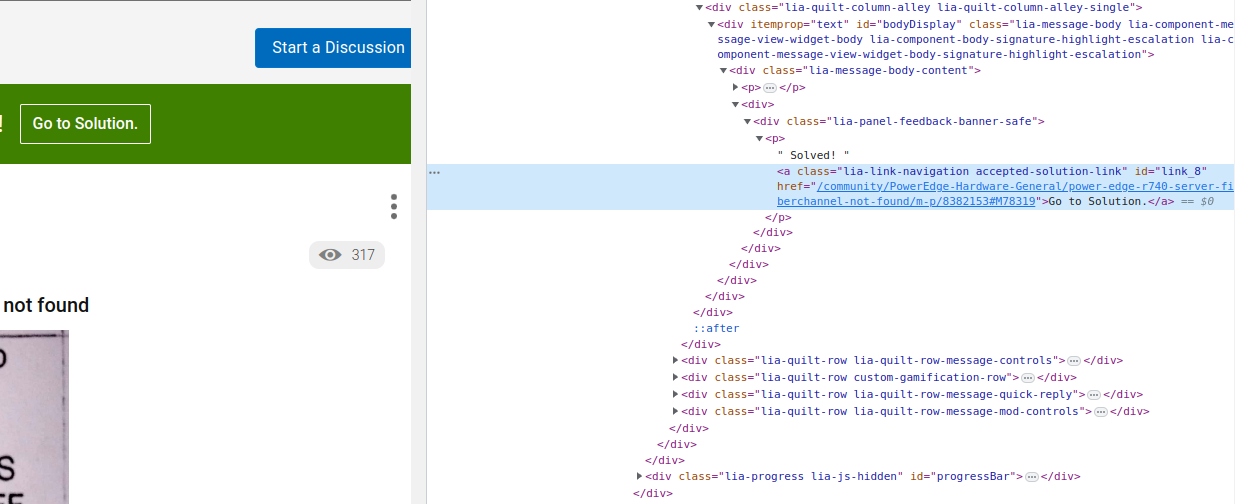

1. Copy text from First POst (question) 

    - 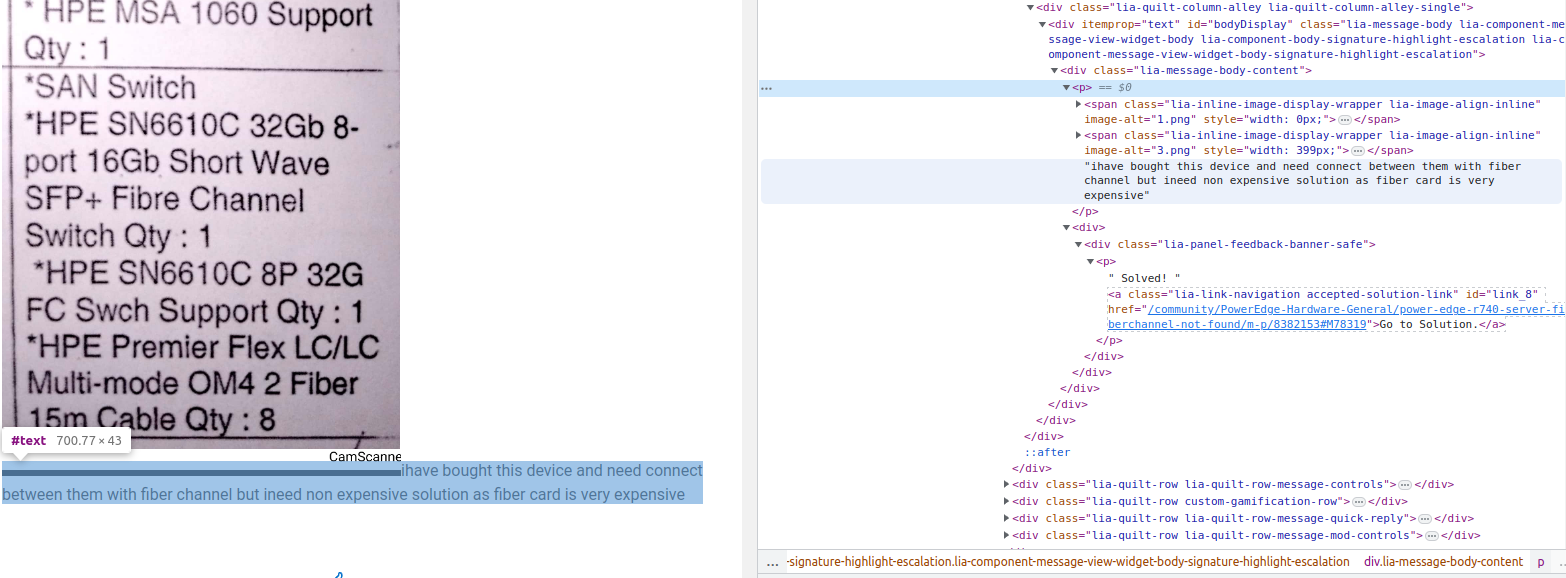


2. JUmp to Solution POst (answer)


    - `<a class="lia-link-navigation accepted-solution-link" id="link_8" href="/community/PowerEdge-Hardware-General/power-edge-r740-server-fiberchannel-not-found/m-p/8382153#M78319">Go to Solution.</a>`


3. Copy Solution post text (answer)

4. CSV (question | answer)


None



## Question


In [54]:
url_list_example = ['https://www.dell.com/community/PowerEdge-Hardware-General/Question-Connecting-PowerEdge-T620-with-APC-UPS/m-p/8393796#M78648',
            'https://www.dell.com/community/PowerEdge-Hardware-General/Question-Connecting-PowerEdge-T620-with-APC-UPS/m-p/8393796#M78648',
            'https://www.dell.com/community/PowerEdge-Hardware-General/Question-Connecting-PowerEdge-T620-with-APC-UPS/m-p/8393796#M78648'
            ]
    

In [66]:
import requests
from bs4 import BeautifulSoup

def extract_question_from_urls(filtered_urls):
    question_list = []
    for url in filtered_urls:
        try:
            response = requests.get(url)
            soup = BeautifulSoup(response.content, 'html.parser')
            message_body = soup.find(class_='lia-message-body-content')
            if message_body:
                question_list.append(message_body.text.strip())
        except requests.exceptions.RequestException:
            # Handle connection errors or invalid URLs
            pass
    return question_list

extracted_question = extract_question_from_urls(filtered_urls)

# Print the extracted text questions
for question in extracted_question:
    print(question)

We provide you a variety of support related videos on our DELL EMC Support YouTube channel. We publish at least one new video every week so make sure you subscribe and stay up to date with the latest turoials, tipps and tricks about server, storage and networking.
 
Here are some playlist you might find helpful for your daily business regarding DELL EMC Enterprise hardware.

OpenManage Server Administrator 
RAID - Tutorials, Information and Troubleshooting 
Dell EMC QuickTips - something about everything 
iDRAC - Setup, Configuration, Troubleshooting 
Dell Lifecycle Controller 
SupportAssist Enterprise Virtual Edition 

You can find the full list here.
 
Something is missing? Got a topic we should cover in one of our videos? Feel free to suggest new topics and give us feedback to existing ones in this thread.
I've just updated the iDRAC in a PowerEdge R340 from 5.10.10.00 to the newly released 6.00.00.00All appears to be working ok, apart from the fans are now running at ~11,000 rpm ra

# Answers

Need to use BS siblings

In [88]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup

def extract_paragraphs_from_urls(url_list):
    paragraphs = []
    driver = webdriver.Chrome()  # Replace with the appropriate WebDriver for your browser
    
    for url in url_list:
        driver.get(url)
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        
        # Press the "Accept All" button for cookies
        accept_button = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, '//a[@aria-label="allow cookies"]')))
        accept_button.click()
        
        # Find and click on the "lia-link-navigation accepted-solution-link" element
        accepted_solution_link = driver.find_element(By.CLASS_NAME, 'lia-link-navigation.accepted-solution-link')
        accepted_solution_link.click()
        
        
        # Extract the content within the <p> tags in "lia-message-body-content"
        message_body_content = soup.find('div', class_='lia-message-body-content')
        if message_body_content is not None:
            p_tags = message_body_content.find_all('p')
            for p_tag in p_tags:
                text = p_tag.get_text(strip=True)
                paragraphs.append(text)
        else:
            paragraphs.append('Content not found')

    driver.quit()
    return paragraphs

# Example usage:
url_list_example = [
    'https://www.dell.com/community/PowerEdge-Hardware-General/High-fan-speed-after-iDRAC-update-to-6-00-00-00/m-p/8253090#M75120'
    
]

paragraphs = extract_paragraphs_from_urls(url_list_example)
for paragraph in paragraphs:
    print(paragraph)


I've just updated the iDRAC in a PowerEdge R340 from5.10.10.00 to the newly released 6.00.00.00
All appears to be working ok, apart from the fans are now running at ~11,000 rpm rather than the ~3,800 rpm they were on the previous version.
I've tried rolling back to the older version and the fans went back to normal.
Upgrade again to v6 and they're screaming again.
Anybody else seeing the same behaviour?
Cheers,Rob
Solved!Go to Solution.


In [89]:
import requests
from bs4 import BeautifulSoup

url = "https://www.dell.com/community/PowerEdge-Hardware-General/High-fan-speed-after-iDRAC-update-to-6-00-00-00/m-p/8253090#M75120"

response = requests.get(url)
content = response.content

soup = BeautifulSoup(content, 'html.parser')
print(soup.prettify())


<!DOCTYPE html>
<html class="no-js" dir="ltr" lang="en" prefix="og: http://ogp.me/ns#">
 <head>
  <title>
   Solved: Re: High fan speed after iDRAC update to 6.00.00.00 - Page 4 - Dell Community
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="For anyone following this thread, iDRAC9 firmware v6.00.02.00 made its way onto the download pages today, which, from my initial testing, seems to" name="description"/>
  <meta content="width=device-width, initial-scale=1.0, user-scalable=yes" name="viewport"/>
  <meta content="2023-05-31T20:33:32-07:00" itemprop="dateModified"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <link href="https://www.dell.com/community/PowerEdge-Hardware-General/High-fan-speed-after-iDRAC-update-to-6-00-00-00/td-p/8224610/page/4" rel="canonical"/>
  <meta content="https://www.dell.com/community/user/viewprofilepage/user-id/112712249" property="article:author"/>
  <meta content="article" property="og:typ

In [78]:
from bs4 import BeautifulSoup
import requests

def extract_answers_from_urls(url_list_example):
    extracted_answers = []

    for url in url_list_example:
        response = requests.get(url)
        content = response.content
        soup = BeautifulSoup(content, 'html.parser')

        accepted_solution_checkmark = soup.find('div', class_='lia-message-body-accepted-solution-checkmark')
        if accepted_solution_checkmark is None:
            extracted_answers.append('Accepted solution checkmark not found')
            continue

        message_body_content = accepted_solution_checkmark.find_next_sibling('div', class_='lia-message-body-content')
        if message_body_content is None:
            extracted_answers.append('Message body content not found')
            continue

        text = message_body_content.get_text(strip=True)
        extracted_answers.append(text)

    return extracted_answers

extract_answers_from_urls(url_list_example)

['Message body content not found',
 'Message body content not found',
 'Message body content not found']

In [79]:
from bs4 import BeautifulSoup
import requests

def extract_answers_from_urls(url_list):
    extracted_answers = []

    for url in url_list:
        response = requests.get(url)
        content = response.content
        soup = BeautifulSoup(content, 'html.parser')

        parent_div = soup.find('div', class_='lia-message-body lia-component-message-view-widget-body lia-component-body-signature-highlight-escalation lia-component-message-view-widget-body-signature-highlight-escalation')
        if parent_div is None:
            extracted_answers.append('Parent div not found')
            continue

        message_body_content = parent_div.find('div', class_='lia-message-body-content')
        if message_body_content is None:
            extracted_answers.append('Message body content not found')
            continue

        text = message_body_content.get_text(strip=True)
        extracted_answers.append(text)

    return extracted_answers

extract_answers_from_urls(url_list_example)




['Greetings,I have the following PowerEdge Dell Server T620 and it has ESXI 7 installed on it.Is it possible by any chance to configure an APC UPS with it? Through iDrac or maybe through the host ESXI?The APC UPS ishttps://www.amazon.ca/gp/product/B0779QFRRTSolved!Go to Solution.',
 'Greetings,I have the following PowerEdge Dell Server T620 and it has ESXI 7 installed on it.Is it possible by any chance to configure an APC UPS with it? Through iDrac or maybe through the host ESXI?The APC UPS ishttps://www.amazon.ca/gp/product/B0779QFRRTSolved!Go to Solution.',
 'Greetings,I have the following PowerEdge Dell Server T620 and it has ESXI 7 installed on it.Is it possible by any chance to configure an APC UPS with it? Through iDrac or maybe through the host ESXI?The APC UPS ishttps://www.amazon.ca/gp/product/B0779QFRRTSolved!Go to Solution.']

In [93]:
from bs4 import BeautifulSoup
import requests

def extract_answers_from_urls(url_list):
    extracted_answers = []

    for url in url_list:
        response = requests.get(url)
        content = response.content
        soup = BeautifulSoup(content, 'html.parser')

        parent_div = soup.find('div', class_='meta content')
        if parent_div is None:
            extracted_answers.append('Parent div not found')
            continue

        message_body_content = parent_div.find('div', class_='lia-message-body-content')
        if message_body_content is None:
            extracted_answers.append('Message body content not found')
            continue

        text = message_body_content.get_text(strip=True)
        extracted_answers.append(text)

    return extracted_answers

extract_answers_from_urls(url_list_example)

['Parent div not found']

In [94]:
from bs4 import BeautifulSoup
import requests

def extract_paragraphs_from_urls(url_list):
    paragraphs = []

    for url in url_list:
        response = requests.get(url)
        content = response.content
        soup = BeautifulSoup(content, 'html.parser')

        message_body_contents = soup.find_all('div', class_='meta content')

        for message_body_content in message_body_contents:
            p_tags = message_body_content.find_all('p')

            for p_tag in p_tags:
                text = p_tag.get_text(strip=True)
                paragraphs.append(text)

    return paragraphs

# Example usage:
url_list_example = [
    'https://www.dell.com/community/PowerEdge-Hardware-General/Question-Connecting-PowerEdge-T620-with-APC-UPS/m-p/8393796#M78648',
      'https://www.dell.com/community/PowerEdge-Hardware-General/Question-Connecting-PowerEdge-T620-with-APC-UPS/m-p/8393796#M78648',
        'https://www.dell.com/community/PowerEdge-Hardware-General/Question-Connecting-PowerEdge-T620-with-APC-UPS/m-p/8393796#M78648'
]

paragraphs = extract_paragraphs_from_urls(url_list_example)
for paragraph in paragraphs:
    print(paragraph)


In [95]:
extract_paragraphs_from_urls(url_list)

[]

<a class="lia-link-navigation accepted-solution-link" id="link_8" href="/community/PowerEdge-Hardware-General/High-fan-speed-after-iDRAC-update-to-6-00-00-00/m-p/8253090#M75120">Go to Solution.</a>

```
<div itemprop="text" id="bodyDisplay_0" class="lia-message-body lia-component-message-view-widget-body lia-component-body-signature-highlight-escalation lia-component-message-view-widget-body-signature-highlight-escalation">
	
		<div class="lia-message-body-content">
			
				
					
						<div class="lia-message-body-accepted-solution-checkmark"></div>
					
					
						<p>For anyone following this thread, iDRAC9 firmware&nbsp;<span>v6.00.02.00 made its way onto the download pages today, which, from my initial testing, seems to fix the fan issue on an R340.</span></p><p>&nbsp;</p><p>Cheers,</p><p>Rob</p>
					
				
			
			
				
			
			
				
			
			
				<div class="view-original-post-link">
					<p>
						<a class="lia-link-navigation original-post-link" id="link_22" href="/community/PowerEdge-Hardware-General/High-fan-speed-after-iDRAC-update-to-6-00-00-00/m-p/8253090#M75120">View solution in original post</a>
					</p>
				</div>
			
			
			
			
			
		</div>
		
		
	

	
	
</div>
```

In [70]:
import requests
from bs4 import BeautifulSoup

def extract_answer_from_urls(url_list_example):
    answer_list = []
    for url in url_list_example:
        try:
            response = requests.get(url)
            soup = BeautifulSoup(response.content, 'html.parser')
            message_body = soup.find("div", class_="lia-message-body-content").get_text(strip=True)

            if message_body:
                answer_list.append(message_body.strip())
        except requests.exceptions.RequestException:
            # Handle connection errors or invalid URLs
            pass
    return answer_list

extracted_answer = extract_answer_from_urls(url_list_example)

# Print the extracted text answers
for answer in extracted_answer:
    print(answer)



Greetings,I have the following PowerEdge Dell Server T620 and it has ESXI 7 installed on it.Is it possible by any chance to configure an APC UPS with it? Through iDrac or maybe through the host ESXI?The APC UPS ishttps://www.amazon.ca/gp/product/B0779QFRRTSolved!Go to Solution.
Greetings,I have the following PowerEdge Dell Server T620 and it has ESXI 7 installed on it.Is it possible by any chance to configure an APC UPS with it? Through iDrac or maybe through the host ESXI?The APC UPS ishttps://www.amazon.ca/gp/product/B0779QFRRTSolved!Go to Solution.
Greetings,I have the following PowerEdge Dell Server T620 and it has ESXI 7 installed on it.Is it possible by any chance to configure an APC UPS with it? Through iDrac or maybe through the host ESXI?The APC UPS ishttps://www.amazon.ca/gp/product/B0779QFRRTSolved!Go to Solution.


In [ ]:
from bs4 import BeautifulSoup

html = """
<div class="MessageView lia-message-view-forum-message lia-message-view-display lia-row-standard-unread lia-thread-reply lia-list-row-thread-solved lia-accepted-solution">
    <!-- ... HTML content ... -->
</div>
"""

soup = BeautifulSoup(html, "html.parser")
message_body = soup.find("div", class_="lia-message-body-content").get_text(strip=True)

print(message_body)


## clean up the questions


```
cleaned_questions = []

for question in extracted_question:
    # Split the question into words
    words = question.split()
    
    # Remove words that match "Solved!" or "Go to Solution."
    cleaned_words = [word for word in words if word not in ["Solved!", "Go", "to", "Solution."]]
    
    # Join the cleaned words back into a sentence
    cleaned_question = " ".join(cleaned_words)
    
    # Append the cleaned question to the cleaned_questions list
    cleaned_questions.append(cleaned_question)

# Print the cleaned questions
for question in cleaned_questions:
    print(question)

```

The first URL, kind of works while second chrashes, lets look at the elements for both

- https://www.dell.com/community/PowerEdge-Hardware-General/DELL-EMC-Support-videos/td-p/7529991/jump-to/first-unread-message
- https://www.dell.com/community/PowerEdge-Hardware-General/High-fan-speed-after-iDRAC-update-to-6-00-00-00/td-p/8224610/jump-to/first-unread-message


# Question test 2 (using list of URLs)

